# Analyzing, and Visualizing Data

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

matplotlib.style.use('ggplot')

df = pd.read_csv('data/twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1981 non-null   int64  
 1   timestamp           1981 non-null   object 
 2   source              1981 non-null   object 
 3   text                1981 non-null   object 
 4   expanded_urls       1981 non-null   object 
 5   rating_numerator    1981 non-null   float64
 6   rating_denominator  1981 non-null   float64
 7   name                1981 non-null   object 
 8   favorites           1981 non-null   int64  
 9   retweets            1981 non-null   int64  
 10  user_followers      1981 non-null   int64  
 11  jpg_url             1981 non-null   object 
 12  dog_stage           1981 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 201.3+ KB


In [2]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage
0,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,419,214,8931623,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None
1,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,724,532,8931623,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None
2,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,291,81,8931623,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None
3,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,178,56,8931623,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,None
4,667470559035432960,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,a,235,89,8931623,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10.0,10.0,Kilo,4118,1181,8931623,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,puppo
1977,803773340896923648,2016-11-30 01:31:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12.0,10.0,Diogi,9988,2712,8931619,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,puppo
1978,878776093423087618,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10.0,Snoopy,17747,3625,8931616,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,puppo
1979,787717603741622272,2016-10-16 18:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13.0,10.0,Tonks,10193,2748,8931620,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,puppo


Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

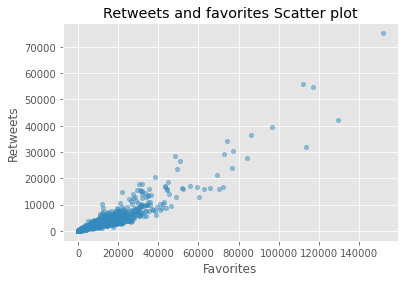

In [6]:

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

**There is a positive relation between retweets and favorites**
Lets plot a heatmap.

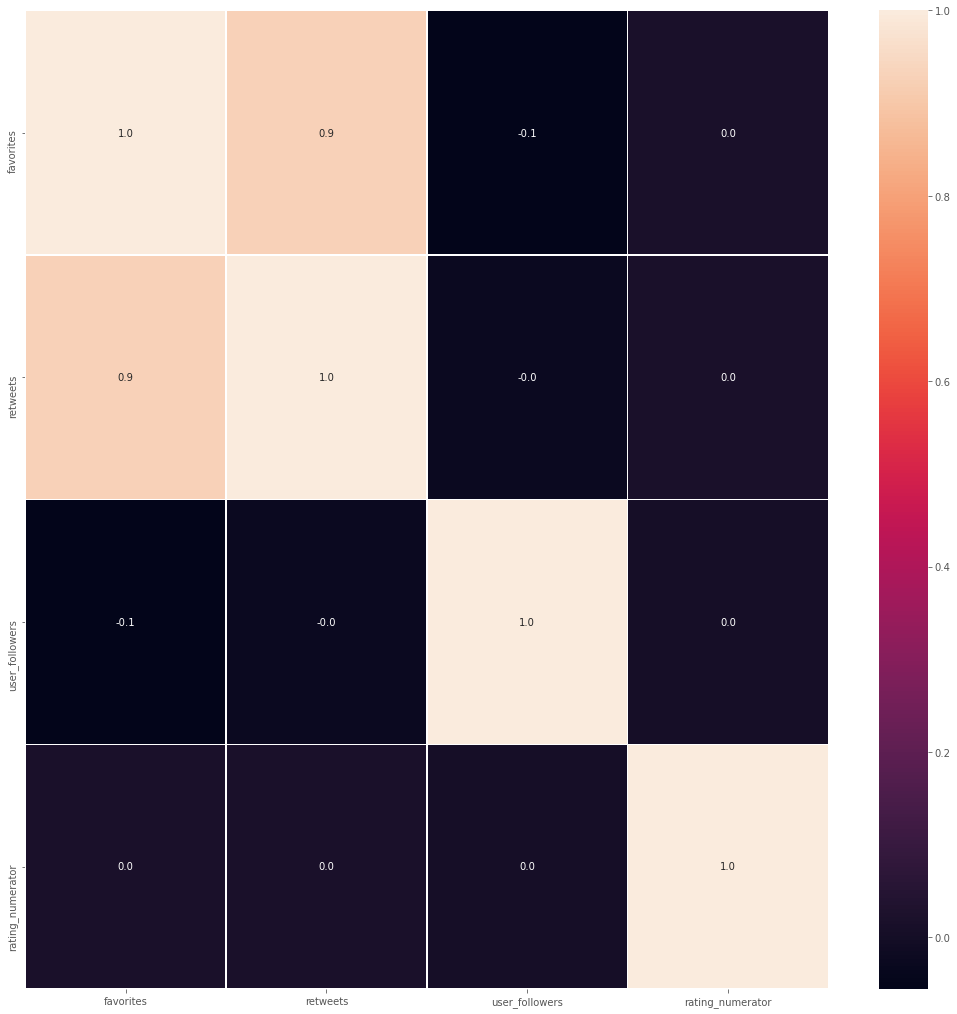

In [4]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**There is a strong correalation between favorites and retweets**

In [5]:
df[df['dog_stage'] != 'None'].groupby('dog_stage')['favorites'].mean()

dog_stage
doggo      18396.096774
floofer    12207.875000
pupper      6751.000000
puppo      21416.347826
Name: favorites, dtype: float64

**Most favorite dog is Puppo.**

# Conclusions

The Twitter account `WeRateDogs` (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "16/10". It has acquired over 4.5 million followers.

Most favorite dog is Puppo.
